# 의약품처방정보
* https://www.data.go.kr/dataset/15007117/fileData.do
* 의약품처방정보는 2002년부터 국민건강보험 가입자 중 의약품처방이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 의약품처방전별 개별 의약품에 대한 처방내역(요양개시일자, 1회투약량, 1일투약량, 총투여일수 등)으로 구성된 개방데이터이다.
* 약품일반성분명코드 : http://www.hira.or.kr/rf/medicine/getHistoryList.do?pgmid=HIRAA030035020000
* <img src="https://i.imgur.com/hsrpJp4.png">

http://medinavi.co.kr/search_medicine.asp?keyword1=&keyword2=%EC%9A%B0%EB%A3%A8%EC%82%AC&keyword3=%EB%8C%80%EC%9B%85%EC%A0%9C%EC%95%BD

```
우루사정100밀리그램 246501ATB
우루사정200밀리그램 246502ATB
우루사정300밀리그램 246506ATB
우루사100mg연질캅셀 246501ACS
우루사캅셀200mg 246502ACH
우루사캡슐250밀리그램 246503ACH
고덱스캡슐 427800ACH
```


<img src="https://i.imgur.com/4dEl5Dl.jpg">

출처 : http://www.docdocdoc.co.kr/news/articleView.html?idxno=1053667

## 라이브러리 로드

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

## 데이터 로드

T60* 을 하면 t60으로 시작하는 파일을 확인할 수 있다.

In [19]:
%pwd

'C:\\Users\\pomel\\파이썬_오늘코드'

In [20]:
%ls open_drug/T60_*

매개 변수 포맷이 틀립니다 - "60_*".


In [21]:
%ls data/ursa*

스위치가 틀립니다 - "ursa*".


In [66]:
year = 2019
part = 3
nhis = pd.read_csv(f"./T60_{year}_{part}.csv", encoding="cp949")
nhis.shape

(11936757, 15)

In [43]:
# 2015, 2014, 2013, 2012, 2011
year = 2017
part = 3
# nhis = pd.read_csv(f"open_drug/NHIS_OPEN_T60_{year}_PART{part}.CSV", encoding="cp949")
nhis = pd.read_csv(f"open_drug/국민건강보험공단_의약품처방정보_{year}({part}).CSV", encoding="cp949")
nhis.shape

FileNotFoundError: [Errno 2] No such file or directory: 'open_drug/국민건강보험공단_의약품처방정보_2017(3).CSV'

In [67]:
nhis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11936757 entries, 0 to 11936756
Data columns (total 15 columns):
 #   Column       Dtype  
---  ------       -----  
 0   기준년도         int64  
 1   가입자 일련번호     int64  
 2   처방내역일련번호     int64  
 3   일련번호         int64  
 4   성별코드         int64  
 5   연령대코드(5세단위)  int64  
 6   시도코드         int64  
 7   요양개시일자       int64  
 8   약품일반성분명코드    object 
 9   1회 투약량       float64
 10  1일투약량        int64  
 11  총투여일수        int64  
 12  단가           float64
 13  금액           int64  
 14  데이터 공개일자     int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.3+ GB


<AxesSubplot:>

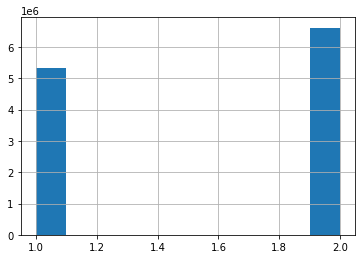

In [68]:
nhis["성별코드"].hist()

In [69]:
nhis["금액"].describe()
price_max = nhis["금액"].max()

In [70]:
nhis[nhis["금액"].max() == price_max]

KeyError: True

In [71]:
# 우루사정100밀리그램 246501ATB
# 우루사정200밀리그램 246502ATB
# 우루사정300밀리그램 246506ATB
# 우루사100mg연질캅셀 246501ACS
# 우루사캅셀200mg 246502ACH
# 우루사캡슐250밀리그램 246503ACH
# 고덱스캡슐 427800ACH
# ["246501ATB", "246502ATB", "246506ATB", 
# "246501ACS", "246502ACH", "246503ACH", "427800ACH"]

ursa = nhis[
    nhis["약품일반성분명코드"].isin(
        ["246501ATB", "246502ATB", "246506ATB", 
         "246501ACS", "246502ACH", "246503ACH", "427800ACH"])]
ursa

# 여러개의 항목을 불러올 때 .isin([""])을 쓴다.

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
1263,2019,700038,107449377,9,1,13,41,20191203,427800ACH,1.0,1,30,388.0,11640,20201222
1344,2019,700039,107900133,1,2,16,41,20190422,246506ATB,1.0,2,14,274.0,7672,20201222
1354,2019,700039,104154400,1,2,16,41,20191011,246506ATB,1.0,2,180,274.0,98640,20201222
1373,2019,700039,105247892,1,2,16,41,20190510,246506ATB,1.0,2,150,274.0,82200,20201222
2538,2019,700067,103002211,1,1,9,28,20190822,246501ATB,1.0,3,14,90.0,3780,20201222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11931268,2019,999868,108936966,3,2,12,41,20190725,427800ACH,1.0,1,60,402.0,24120,20201222
11931271,2019,999868,106182011,3,2,12,41,20190916,427800ACH,1.0,1,50,388.0,19400,20201222
11931274,2019,999868,108375768,3,2,12,41,20190408,427800ACH,1.0,1,50,402.0,20100,20201222
11931277,2019,999868,100117993,3,2,12,41,20191115,427800ACH,1.0,1,60,388.0,23280,20201222


 - 총 투여일 수와 단가를 곱하면 금액을 구할 수 있다.
 - 주성분 코드가 같으면 비슷한 효과를 가진 약이다. 
 - 약품일반성분명 코드를 통해서 특정 약품에 대한 정보을 알 수 있어, 분석이 가능하다. (주사제인지, 알약인지 등등의 정보 획득 가능)

In [72]:
# 고덱스인 427800ACH 만 가져와서 데이터의 갯수가 몇개인지 shape 로 봅니다.
godex_shape = ursa[ursa["약품일반성분명코드"] == "427800ACH"].shape
godex_shape

(9714, 15)

In [73]:
ursa.shape

(29350, 15)

In [74]:
ursa.shape[0] - godex_shape[0]

19636

In [75]:
# "약품일반성분명코드"로 value_counts 를 구합니다.
ursa["약품일반성분명코드"].value_counts()

246501ATB    12064
427800ACH     9714
246502ATB     7327
246506ATB      245
Name: 약품일반성분명코드, dtype: int64

In [76]:
# csv 파일로 저장합니다
year = 2019
part = 3
ursa.to_csv(f"data/ursa_{year}_{part}.csv", index=False)

In [77]:
# 제대로 저장되었는지 확인합니다.
pd.read_csv(f"data/ursa_{year}_{part}.csv").shape

(29350, 15)

- 빅데이터에서 필요한 부분의 데이터를 가지고 와서 분석한다.